<a href="https://colab.research.google.com/github/Pavankalyan2006/AD-/blob/master/6_2_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files
import numpy as np

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
df = df.drop(columns=["Id"])

X = df.drop(columns=["Price"])
y = df["Price"]

categorical_features = ["Model"]
numeric_features = ["Age_08_04", "KM", "HP", "Doors", "Cylinders", "Gears", "Weight"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

def predict_car_price():
    model_input = input("Enter Model: ")
    age = int(input("Enter Age of Car: "))
    km = int(input("Enter Kilometers Driven: "))
    hp = int(input("Enter Horsepower: "))
    doors = int(input("Enter Number of Doors: "))
    cylinders = int(input("Enter Number of Cylinders: "))
    gears = int(input("Enter Number of Gears: "))
    weight = int(input("Enter Weight of Car: "))

    input_data = pd.DataFrame([[model_input, age, km, hp, doors, cylinders, gears, weight]],
                              columns=categorical_features + numeric_features)

    predicted_price = model.predict(input_data)[0]
    print(f"Predicted Car Price: {predicted_price:.2f}")

predict_car_price()


IndexError: list index out of range

Saving Cars.csv to Cars.csv
   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149
R-squared: 0.6749527236507018
Adjusted R-squared: 0.5666036315342691
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        06:33:42   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
D

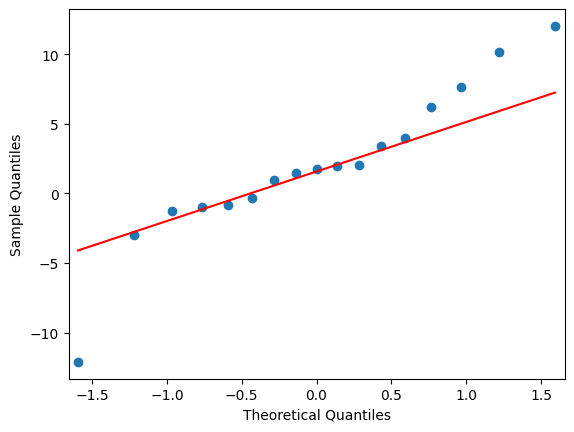

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

print(df.head())

X = df.drop('MPG', axis=1)  # Independent variables
y = df['MPG']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute R-squared
r2 = r2_score(y_test, y_pred)

# Compute Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

# Using statsmodels for more detailed summary
X = sm.add_constant(X)  # Add intercept term
model_stats = sm.OLS(y, X).fit()

# Print model summary
print(model_stats.summary())

# Extract R-squared and Adjusted R-squared from statsmodels
r2_statsmodel = model_stats.rsquared
adjusted_r2_statsmodel = model_stats.rsquared_adj

print(f"R-squared (Statsmodels): {r2_statsmodel}")
print(f"Adjusted R-squared (Statsmodels): {adjusted_r2_statsmodel}")

# Calculate Variance Inflation Factor (VIF)
hp_model = smf.ols("HP ~ WT", data=df).fit()
hp_r2 = hp_model.rsquared
vif = 1 / (1 - hp_r2)
print(f"VIF: {vif}")


residuals = y_test - y_pred


sm.qqplot(residuals, line="q")
plt.show()


In [ ]:
# prompt: find the (np.agrmax(c_v),np.max()) f

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data (assuming 'cars.csv' was uploaded in the previous step)
try:
  df = pd.read_csv("cars.csv")
except FileNotFoundError:
  from google.colab import files
  uploaded = files.upload()
  file_name = list(uploaded.keys())[0]
  df = pd.read_csv(file_name)

# Prepare data
X = df.drop('MPG', axis=1)  # Independent variables
y = df['MPG']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a constant to the data for the statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train the model with statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Get p-values
p_values = model_sm.pvalues

# Identify the maximum p-value and its index (column name)
max_p_value = np.max(p_values)
max_p_value_index = np.argmax(p_values)

print(f"Max P-value: {max_p_value}")
print(f"Index of Max P-value: {max_p_value_index}")

# Calculate the correlation matrix
correlation_matrix = df.corr()
# Find the maximum correlation and its indices
c_v = correlation_matrix.values
c_v = np.abs(c_v)
np.fill_diagonal(c_v, 0)
max_correlation = np.max(c_v)
max_correlation_index = np.unravel_index(np.argmax(c_v, axis=None), c_v.shape)
print("Maximum correlation:")
print(max_correlation)
print("indexes:")
print(max_correlation_index)

#Print Max correlation with indexes
print(f"The max value ({np.max(c_v):.4f}) is in position ({np.unravel_index(np.argmax(c_v), c_v.shape)})")


Saving Cars.csv to Cars (1).csv
Max P-value: 0.6113007218607414
Index of Max P-value: 4
Maximum correlation:
0.999203080186856
indexes:
(2, 4)
The max value (0.9992) is in position ((2, 4))


Saving Cars.csv to Cars (2).csv


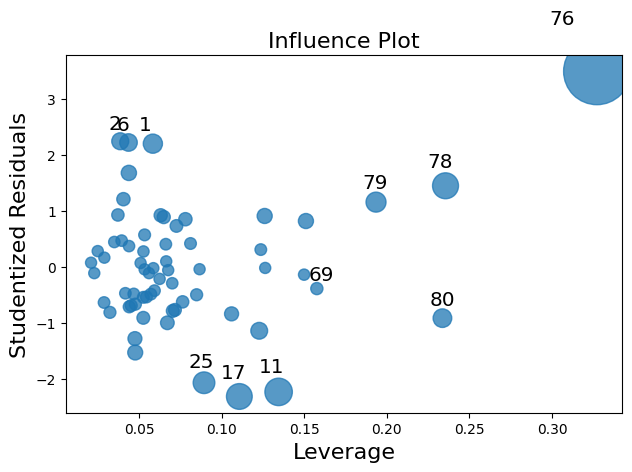

In [ ]:
# prompt: find the influence plot

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data
try:
  df = pd.read_csv("cars.csv")
except FileNotFoundError:
  uploaded = files.upload()
  file_name = list(uploaded.keys())[0]
  df = pd.read_csv(file_name)

# Prepare data
X = df.drop('MPG', axis=1)
y = df['MPG']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a constant to the data for statsmodels
X_train_sm = sm.add_constant(X_train)

# Train the model with statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Influence plot
fig = sm.graphics.influence_plot(model_sm, criterion="cooks")
fig.tight_layout(pad=1.0)
plt.show()


In [ ]:
hp_model = smf.ols("MPG ~ VOL + SP + HP", data=df).fit()


In [ ]:
hp_model = smf.ols("HP ~ WT", data=df).fit()
hp_r2 = hp_model.rsquared
print(f"R-squared for HP model: {hp_r2}")



R-squared for HP model: 0.005854249168476322


In [ ]:
hp_model = smf.ols("HP ~ VOL", data=df).fit()
hp_r2 = hp_model.rsquared
print(f"R-squared for HP model: {hp_r2}")



R-squared for HP model: 0.005999970050445058


Saving Cars.csv to Cars (3).csv
R-squared for HP model: 0.005854249168476322
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        07:05:51   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

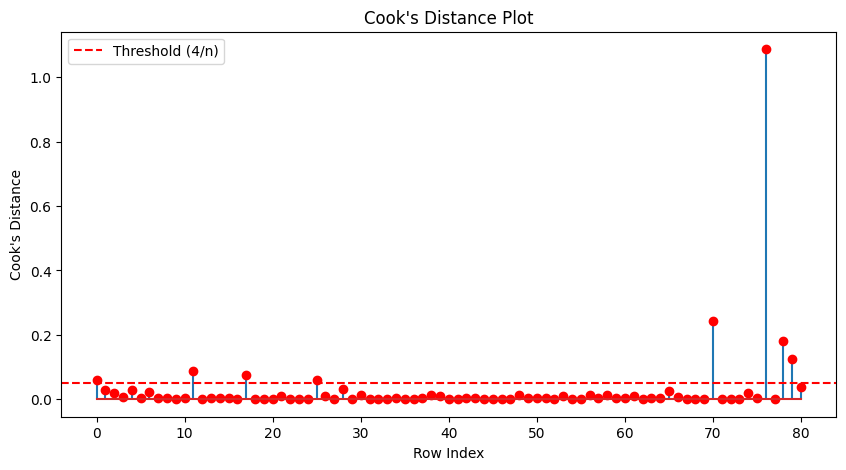

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Step 1: Upload CSV file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Step 2: Read the CSV file
df = pd.read_csv(file_name)

# Step 3: Handle missing values (remove rows with NaN)
df = df.dropna()

# Step 4: Simple Linear Regression (HP ~ WT)
hp_model = smf.ols("HP ~ WT", data=df).fit()
hp_r2 = hp_model.rsquared
print(f"R-squared for HP model: {hp_r2}")

# Step 5: Multiple Linear Regression (Predicting MPG)
X = df.drop('MPG', axis=1)  # Independent variables
y = df['MPG']  # Target variable

# Standardize the features (optional but useful)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept to X
X_with_intercept = sm.add_constant(X_scaled)

# Fit the OLS model
model_stats = sm.OLS(y, X_with_intercept).fit()
print(model_stats.summary())  # Print regression summary

# Step 6: Compute Cook's Distance
model_influence = model_stats.get_influence()
cooks_d, _ = model_influence.cooks_distance

# Identify influential points
threshold = 4 / len(X)
influential_points = np.where(cooks_d > threshold)[0]
print(f"Influential Points (Cook's Distance > {threshold:.4f}): {influential_points}")

# Step 7: Plot Cook's Distance
plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(X)), np.round(cooks_d, 3), markerfmt="ro")
plt.axhline(y=threshold, color='r', linestyle='--', label="Threshold (4/n)")
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Step 1: Upload CSV file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Step 2: Read the CSV file
df = pd.read_csv(file_name)

# Step 3: Handle missing values
df = df.dropna()

# Step 4: Define independent (X) and dependent (y) variables
X = df.drop('MPG', axis=1)  # Independent variables
y = df['MPG']  # Target variable

# Step 5: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Add intercept to X
X_with_intercept = sm.add_constant(X_scaled)

# Step 7: Fit the OLS regression model
model_stats = sm.OLS(y, X_with_intercept).fit()
print(model_stats.summary())

# Step 8: New data point (HP=40, VOL=95, SP=102, WT=35)
new_data = pd.DataFrame({'HP': [40], 'VOL': [95], 'SP': [102], 'WT': [35]})

# Step 9: Standardize new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Step 10: Add intercept (Must be 1 for prediction consistency)
new_data_with_intercept = np.hstack([np.ones((new_data_scaled.shape[0], 1)), new_data_scaled])

# Step 11: Predict MPG for new data
predicted_mpg = model_stats.predict(new_data_with_intercept)

print(f"Predicted MPG for HP=40, VOL=95, SP=102, WT=35: {predicted_mpg[0]:.2f}")


Saving Cars.csv to Cars (6).csv
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        07:10:27   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.422